# PROJECT FAKE NEWS DETECTION

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/news_train.csv")
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
x_df = df['text']
y_df = df['label']

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(x_df)
freq_term_matrix = count_vectorizer.transform(x_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)
print(tf_idf_matrix)

  (0, 145628)	0.008824118297491561
  (0, 145306)	0.04519198046499708
  (0, 145264)	0.010316050744314404
  (0, 145254)	0.010842630450908688
  (0, 144239)	0.04074732197992389
  (0, 144233)	0.08752206659095417
  (0, 144167)	0.03477287798339394
  (0, 144112)	0.01265863187643227
  (0, 143647)	0.025601509108635574
  (0, 143483)	0.02415293991655226
  (0, 143238)	0.008383778053765818
  (0, 142894)	0.03732424824157152
  (0, 142690)	0.008137857946966153
  (0, 142658)	0.025583120218412754
  (0, 142599)	0.0252786055101258
  (0, 142357)	0.01562949895822612
  (0, 142251)	0.011590045098573096
  (0, 142143)	0.02750697036818466
  (0, 142047)	0.013046460060619424
  (0, 141885)	0.05656162488149217
  (0, 141816)	0.011253235663490341
  (0, 141592)	0.055355620375108314
  (0, 140761)	0.02613942679512965
  (0, 140736)	0.020164208580259167
  (0, 140713)	0.016312405646611183
  :	:
  (18284, 6387)	0.014564776481095144
  (18284, 6313)	0.03598369091147204
  (18284, 5956)	0.011325777894807152
  (18284, 5166)	0.0169

In [9]:
# Splitting the data into test data and train data
x_train, x_test, y_train, y_test = train_test_split(tf_idf_matrix,y_df, random_state=0)

In [10]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
Accuracy = logreg.score(x_test, y_test)
print(Accuracy*100)

94.92563429571304


In [11]:
#NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
Accuracy = NB.score(x_test, y_test)
print(Accuracy*100)

69.7069116360455


In [12]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
Accuracy = clf.score(x_test, y_test)
print(Accuracy*100)

89.1732283464567


In [14]:
# PASSIVE-AGGRESSIVE CLASSIFIER

from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(x_train,y_train)
 #Predict on the test set and calculate accuracy
y_pred=pac.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.94%


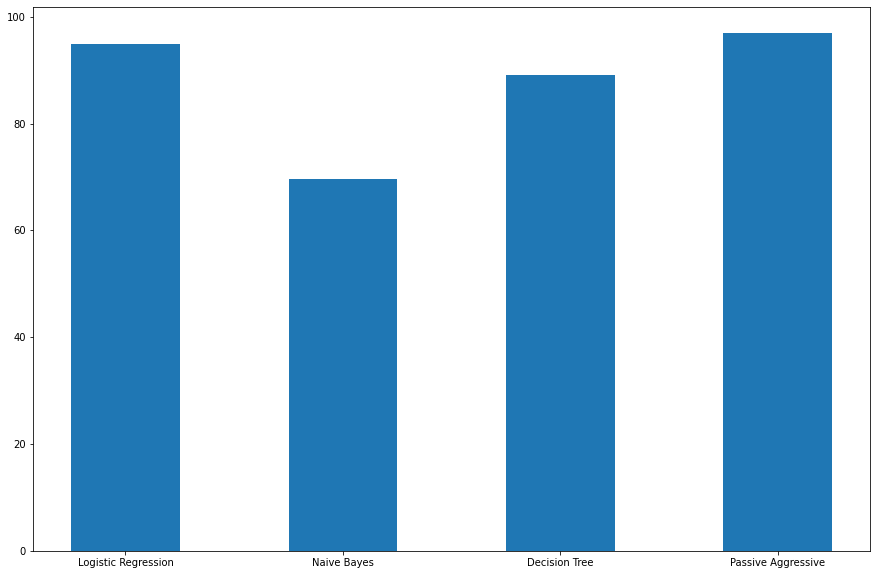

In [16]:
scores = {"Logistic Regression" : 94.92, "Naive Bayes" : 69.71, "Decision Tree" : 89.17, "Passive Aggressive" : 96.94}

plt.figure(figsize=(15, 10))
plt.bar(*zip(*scores.items()), width = 0.5)
plt.show()